# Evolving Neural Network

Praktik:
* Dense Feed Forward Network
* Regression Problem



# Data

In [ ]:
import pandas as pd

data = {
    'x1':[5,2,7,5,3],
    'x2':[1,6,2,7,4],
    'target': [1200,500,400,1000,100]
}
df = pd.DataFrame(data)
df

,x1,x2,target
0,5,1,1200
1,2,6,500
2,7,2,400
3,5,7,1000
4,3,4,100


# Evolving Neural Network

<ipython-input-10-04483dcc75e2>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.population.append(np.array(layers))



generasi ke 0 - jumlah populasi 40 - terbaik: [array([[-1.48787629, -1.50755442, -0.55154172, -0.31878825, -0.17935724,
          0.50533925, -0.88393343,  0.87437768],
        [ 0.70373911,  1.43447943, -0.52401291, -0.15982365,  2.60409187,
         -1.72772478, -0.00602747,  1.1057555 ]])
 array([[-1.65634793],
        [-3.35173564],
        [-0.45684344],
        [ 0.98447882],
        [ 1.17161997],
        [-0.45316657],
        [-1.11508558],
        [ 0.14806785]])] - jarak 730.2904337212199


generasi ke 1 - jumlah populasi 48 - terbaik: [array([[-1.48787629, -1.50755442, -0.55154172, -0.31878825, -0.17935724,
          0.50533925, -0.88393343,  0.87437768],
        [ 0.70373911,  1.43447943, -0.52401291, -0.15982365,  2.60409187,
         -1.72772478, -0.00602747,  1.1057555 ]])
 array([[-1.65634793],
        [-3.35173564],
        [-0.45684344],
        [ 0.98447882],
        [ 1.17161997],
        [-0.45316657],
        [-1.11508558],
        [ 0.14806785]])] - jarak 730.2

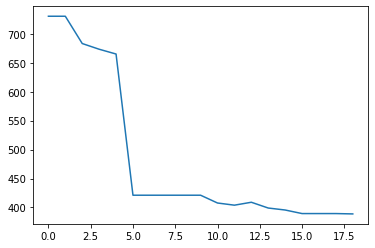

In [ ]:
import numpy as np
import math
import random
import operator

class EvolvingNN:
  def __init__(self,dimensions,features,output):
    self.dimensions = dimensions
    self.features = features
    self.output = output

  '''
  Membuat populasi awal sesuai dengan jumlah yang ditentukan
  '''
  def init(self,num_population):
    self.population = []
    for i in range(num_population):
      layers = []
      for j in range(len(self.dimensions)-1):
        shape = (self.dimensions[j],self.dimensions[j+1])
        layer = np.random.normal(size=shape)
        layers.append(layer)
      self.population.append(np.array(layers))


  '''
  Fungsi menghitung fitness individu
  '''
  def fitness_individu(self,individu):
    # activation function: f(x) = x
    # bias = 0
    # error function = RMSE
    pred_list = []
    for train in self.features:
      pred = np.dot(train,individu[0])
      for layer in individu[1:]:
        pred = np.dot(pred,layer)
      pred_list.extend(pred)
    # rmse
    return np.sqrt(np.square(pred_list - self.output).mean())


  '''
  Menghitung fitness untuk populasi
  Diurutkan, kemudian diambil sebesar elite_percentage
  '''
  def fitness_population(self,elite_percentage):
    new_pop = []
    for id_ind in range(len(self.population)):
      eval = self.fitness_individu(self.population[id_ind]) 
      new_pop.append((eval,self.population[id_ind]))
    
    # selection ambil sesuai elite_percentage
    # sorting
    new_pop.sort(key=operator.itemgetter(0),reverse=False)
    # ambil top elite_percentage
    select_count = math.floor(len(self.population)*elite_percentage)
    self.population = [x[1] for x in new_pop][:select_count]

  '''
  Memilih berapa banyak terjadi crossover
  Kemudian lakukan generate 1 child untuk tiap crossover
  '''
  def crossover(self,crossover_percentage):
    # jumlah pernikahan
    number_of_crossover = math.floor(crossover_percentage*len(self.population))
    list_parent = random.sample(range(0,len(self.population)),2*number_of_crossover)

    for i in range(number_of_crossover):
      p1 = self.population[list_parent[i]]
      p2 = self.population[list_parent[i+1]]
      m = random.random()
      
      # blend crossover
      c = (1-m) * p1 + m * p2
      self.population.append(c)

  '''
  Mutasi yang digunakan gaussian noise
  '''
  def mutation(self,mutation_percentage):
    number_of_mutation = math.floor(mutation_percentage*len(self.population))

    for i in range(number_of_mutation):
      # ambil individu
      idmutate = random.randint(0,len(self.population)-1)
      self.population[idmutate] = self.population[idmutate] * np.random.normal(1,1)
      

  '''
  Fungsi utama
  '''
  def ga(self):
    self.init(50)
    number_of_iteration = 20
    rmse = []
    for i in range(number_of_iteration):
      self.fitness_population(0.8)
      
      if i == number_of_iteration - 1:
        return rmse
      
      best_pop = self.population[0]
      rmse.append(self.fitness_individu(best_pop))
      print()
      print("generasi ke",i,"- jumlah populasi",len(self.population),"- terbaik:",best_pop,"- jarak",self.fitness_individu(self.population[0]))
      print()

      self.crossover(0.5)
      self.mutation(0.5)


'''
Jalankan GA
'''
# inputan
dimensions = [2,8,1]
data = df[['x1','x2']].values
output = df['target']

opt = EvolvingNN(dimensions,data,output).ga()

import matplotlib.pyplot as plt

plt.plot(range(len(opt)),opt)

